In [1]:
%matplotlib inline

import os
import re
from klusta.kwik import KwikModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from enum import Enum
from newkwikfile import KwikFile
from datasource import DataSource
from spkpop import SpkPop

###Classe para organização e manipulação das kwikFiles

### Produzindo tabela

In [2]:
kpath = 'LDT-local'
kpath

'LDT-local'

In [3]:
datasource = DataSource()

animais = os.listdir(kpath)
for animal in animais:
    shanks = os.listdir(kpath + '/' + animal)
    for shank in shanks:
        if shank.endswith('.kwik'):
           datasource.add_model(path = (kpath + '/' + animal + '/' + shank), name = (animal + ' ' + shank))

No model has been passed. 
 You can add the models using the add_model() function.
Created class on = LDT-local/2021-01-23/102_CH_g01.kwik !
Created class on = LDT-local/2021-01-23/102_CH_g02.kwik !
Created class on = LDT-local/2021-01-23/102_CH_g03.kwik !
Created class on = LDT-local/2021-01-23/102_CH_g04.kwik !
Created class on = LDT-local/2021-01-23/102_CH_g05.kwik !
Created class on = LDT-local/2021-02-13/102_CH_g01.kwik !
Created class on = LDT-local/2021-02-13/102_CH_g02.kwik !
Created class on = LDT-local/2021-02-13/102_CH_g03.kwik !
Created class on = LDT-local/2021-02-13/102_CH_g04.kwik !
Created class on = LDT-local/2021-02-13/102_CH_g05.kwik !
Created class on = LDT-local/2021-02-13/102_CH_g06.kwik !


### testing newkwikfile.py

In [4]:
names = datasource.model_names

exemplo de utilização das funções de um modelo

In [5]:
# for name in names:
#     spk = datasource.models[name].get_spike_times(a = 1000, b = 4000, return_mode = 'list')
#     clu = datasource.models[name].get_spike_clusters(a = 1000, b = 1100, clu_list = [3,2,11], return_mode = 'list')
#     clusters = datasource.models[name].get_clusters
#     num_of_chanels = datasource.models[name].num_of_channels()
#     groups = datasource.models[name].groups()
#     non_noise = datasource.models[name].list_of_non_noisy_groups()
#     list_groups = datasource.models[name].list_of_groups()
#     spk_count = datasource.models[name].get_spikes_count(a = 1000, b = 4000)

Exemplos de funções do Datasource

In [5]:
datasource.delete_unsorted_models()

In [6]:
for name in datasource.model_names:
    groups = datasource.models[name].list_of_groups()
    print(f'Name: {name} | Groups:{groups}')

Name: 2021-01-23 102_CH_g01.kwik | Groups:['good', 'mua', 'noise']
Name: 2021-01-23 102_CH_g02.kwik | Groups:['good', 'mua', 'noise']
Name: 2021-01-23 102_CH_g03.kwik | Groups:['good', 'mua', 'noise']
Name: 2021-01-23 102_CH_g05.kwik | Groups:['noise']
Name: 2021-02-13 102_CH_g01.kwik | Groups:['good', 'mua', 'noise']
Name: 2021-02-13 102_CH_g03.kwik | Groups:['good', 'mua', 'noise']
Name: 2021-02-13 102_CH_g04.kwik | Groups:['good', 'mua', 'noise']
Name: 2021-02-13 102_CH_g05.kwik | Groups:['good', 'mua', 'noise']
Name: 2021-02-13 102_CH_g06.kwik | Groups:['good', 'mua', 'noise']


In [8]:
# for name in datasource.model_names:
#     fr = datasource.inst_fr(model_name=name,a = 1000 , b = 4000, clu_list = [2])
#     print(len(fr))
#     cv = datasource.get_CV(a = 1000, b = 4000)
#     isi = datasource.get_isi(model_name=name,b=4000)

In [9]:
# name = datasource.model_names[0]
# clusters = datasource.models[name].get_clusters()
# for clu in clusters:
#     spk = datasource.single_unit_spikes(model_name=name,unit_id=clu)
#     cont = range(len(spk))
#     spk = pd.Series(cont, index = spk)
#     spk.plot()

In [10]:
# for name in datasource.model_names:
#     print(f'Name: {name}')
#     mua,clusters = datasource.get_MUA(model_name=name)
#     print(f'Nº of MUA: {len(mua)} | MUA: {clusters}')
#     for clu in clusters:
#         datasource.isMUA(clu,model_name = name)
#     sua, clusters = datasource.get_SUA(model_name=name)
#     for clu in clusters:
#         datasource.isSUA(clu,model_name = name)
#     print(f'Nº of SUA: {len(sua)} | SUA: {clusters}')

In [11]:
# for name in datasource.model_names:
#     ids = datasource.unit_ids(model_name=name)
#     groups = datasource.models[name].groups()
#     print(f'Non Noise clusters: {list(ids.index)}')

In [12]:
# for name in datasource.model_names:
#     print(f'Name: {name}')
#     mua = datasource.number_of_MUA(model_name=name)
#     sua = datasource.number_of_SUA(model_name=name)
#     fr_MUA = datasource.firing_rate_of_MUA(model_name = name,  b = 4000)
#     fr_SUA = datasource.firing_rate_of_SUA(model_name = name, b = 4000)
#     print(f'Fire rate of MUA {fr_MUA} | SUA:{fr_SUA}')
#     print(f'Number of MUA: {mua} | Number of SUA: {sua}')

In [13]:
# for name in datasource.model_names:
#     print(name)
#     _,sua = datasource.get_SUA(model_name=name)
#     print('SUA')
#     for clu in sua:
#         print(f'Clu {clu}: {datasource.get_cluster_contamination(clu,model_name=name)}')
#     _,mua = datasource.get_MUA(model_name=name)
#     print('MUA')
#     for clu in mua:
#         print(f'Clu {clu}: {datasource.get_cluster_contamination(clu,model_name=name)}')

In [14]:
# for name in datasource.model_names:
#     print(name)
#     _,SUA = datasource.get_SUA(model_name=name)
#     sua_contamination = datasource.get_group_contamination(SUA,model_name=name)
#     print(f'SUA contamination: {sua_contamination}')
#     _,MUA = datasource.get_MUA(model_name=name)
#     mua_contamination = datasource.get_group_contamination(MUA,model_name=name) 
#     print(f'MUA contamination: {mua_contamination}')   

The following models where find in this data source:dict_keys(['2021-01-23 102_CH_g01.kwik', '2021-01-23 102_CH_g02.kwik', '2021-02-13 102_CH_g01.kwik', '2021-02-13 102_CH_g03.kwik', '2021-02-13 102_CH_g06.kwik'])


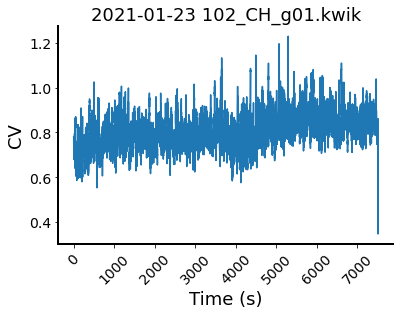

In [15]:
population = SpkPop(datasource)
name = population.data_source.model_names[0]
population.plot_cv(model_name=name)

The following models where find in this data source:dict_keys(['2021-01-23 102_CH_g01.kwik', '2021-01-23 102_CH_g02.kwik', '2021-02-13 102_CH_g01.kwik', '2021-02-13 102_CH_g03.kwik', '2021-02-13 102_CH_g06.kwik'])
[2]
minimum: 0.01383333333342307
maximum: 0.9952333333335446


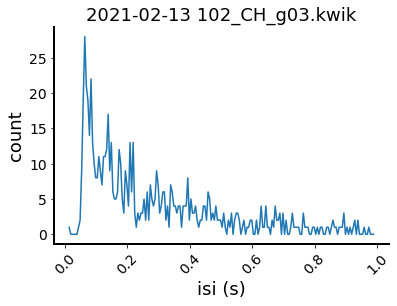

In [16]:
population = SpkPop(datasource)
name = population.data_source.model_names[3]
isi = population.data_source.get_isi(model_name=name, clu_list=[2])
population.plot_isi(model_name=name,isi=isi,a=0, b =4000,bin_size = 50e-4,max_isi_value= 1)
# isi = population.data_source.get_isi(model_name=name,a = 0, b = 1000,mean = False)
# population.plot_isi(model_name=name,isi= isi,a = 0, b = 1000)

The following models where find in this data source:dict_keys(['2021-01-23 102_CH_g01.kwik', '2021-01-23 102_CH_g02.kwik', '2021-02-13 102_CH_g01.kwik', '2021-02-13 102_CH_g03.kwik', '2021-02-13 102_CH_g06.kwik'])


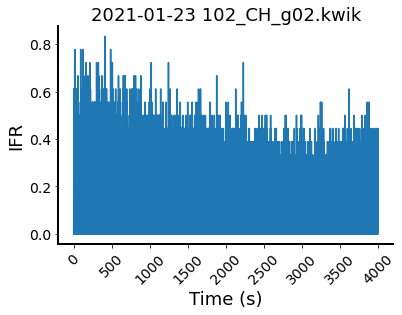

In [17]:
population = SpkPop(datasource)
name = population.data_source.model_names[1]
population.plot_ifr(model_name=name,b = 4000)

The following models where find in this data source:dict_keys(['2021-01-23 102_CH_g01.kwik', '2021-01-23 102_CH_g02.kwik', '2021-02-13 102_CH_g01.kwik', '2021-02-13 102_CH_g03.kwik', '2021-02-13 102_CH_g06.kwik'])
2     0.083939
36    0.080501
7     0.162266
9     0.169712
41    0.240916
11    0.063666
20    3.060588
27    0.257870
28    0.073851
dtype: float64


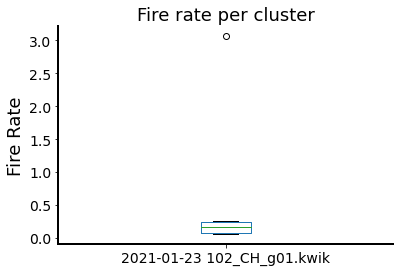

In [18]:
population = SpkPop(datasource)
name = population.data_source.model_names[0]
population.box_plot_fr(model_name=name, b = 4000)

The following models where find in this data source:dict_keys(['2021-01-23 102_CH_g01.kwik', '2021-01-23 102_CH_g02.kwik', '2021-02-13 102_CH_g01.kwik', '2021-02-13 102_CH_g03.kwik', '2021-02-13 102_CH_g06.kwik'])


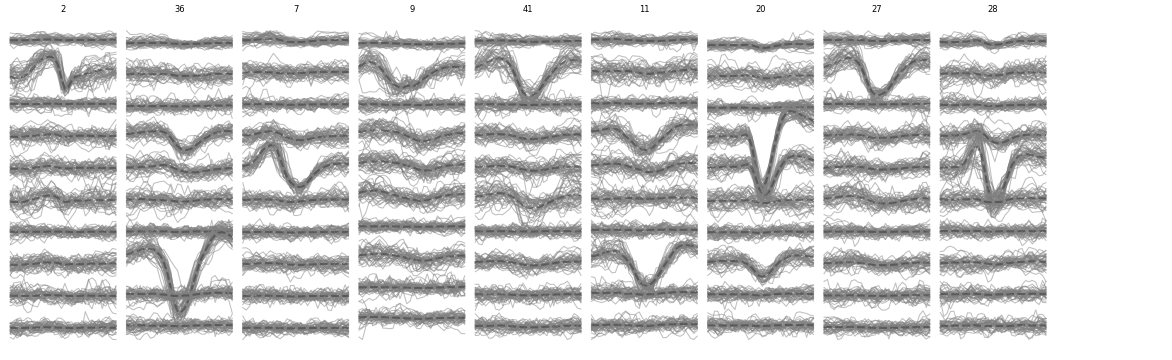

In [19]:
population = SpkPop(datasource)
name = population.data_source.model_names[0]
population.plot_cluster_waveforms(model_name=name,nspikes=40)

In [20]:
# population = SpkPop(datasource)
# name = population.data_source.model_names[0]
# model = population.data_source.models[name]
# dir(model.kwik_model)

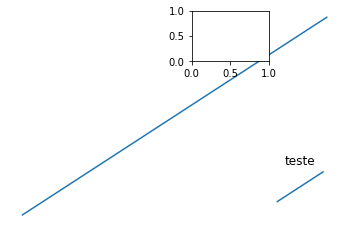

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(range(10))
plt.axis('off')
axin1 = ax.inset_axes([0.8, 0.1, 0.15, 0.15])
axin1.plot(range(10))
axin1.set_axis_off()
axin1.set_title('teste')
axin2 = ax.inset_axes(
        [5, 7, 2.3, 2.3], transform=ax.transData)